In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *

sns.set(rc={'figure.figsize':(11.7,8.27)})
#датасеты
df = pd.read_csv('../matrix_mul/tests3.csv')
df_opt_par = pd.read_csv('../matrix_mul/tests_opt_par_1.csv')

In [4]:
df['time'] = df.time / 1000.0
df = df.groupby(['V', 'algorithmId']).apply(
  lambda x: x.loc[
    x.time.between(x.time.quantile(.25), x.time.quantile(.75))
  ]
).reset_index(drop=True)
df_opt_par = df_opt_par.groupby(['V', 'boundary']).apply(
  lambda x: x.loc[
    x.time.between(x.time.quantile(.25), x.time.quantile(.75))
  ]
).reset_index(drop=True)
#df.time[(df.V == 50) & (df.algorithmId == 1)]

In [62]:
print("Усредненные результаты по каждому тесту")
df.groupby(['V', 'algorithmId']).agg({'time':'mean', 'V':'count'})

Усредненные результаты по каждому тесту


time  V
V   algorithmId                 
50  1                1.383000  4
    2                5.133000  4
250 1              529.496500  4
    2              577.798500  4
400 1             3083.674500  4
    2             3842.825000  4
500 1             7945.689333  3
    2             3775.761333  3
600 1            11287.989500  2
    2            16781.807500  2
700 1            23435.745000  2
    2            23209.107000  2
750 1            27945.686000  2
    2            23156.517000  2
800 1            27039.771500  2
    2            23203.178000  2
850 1            39415.187500  2
    2            13380.957000  2
900 1            47261.998500  2
    2            23101.901500  2

In [99]:
df.groupby('V')['V'].count()

V
50     8
250    8
400    8
500    6
600    4
700    4
750    4
800    4
850    4
900    4
Name: V, dtype: int64

In [124]:
#df.groupby('algorithmId').plot(y='time', x='V', kind='scatter')

Теоретическая кривая и реальные данные


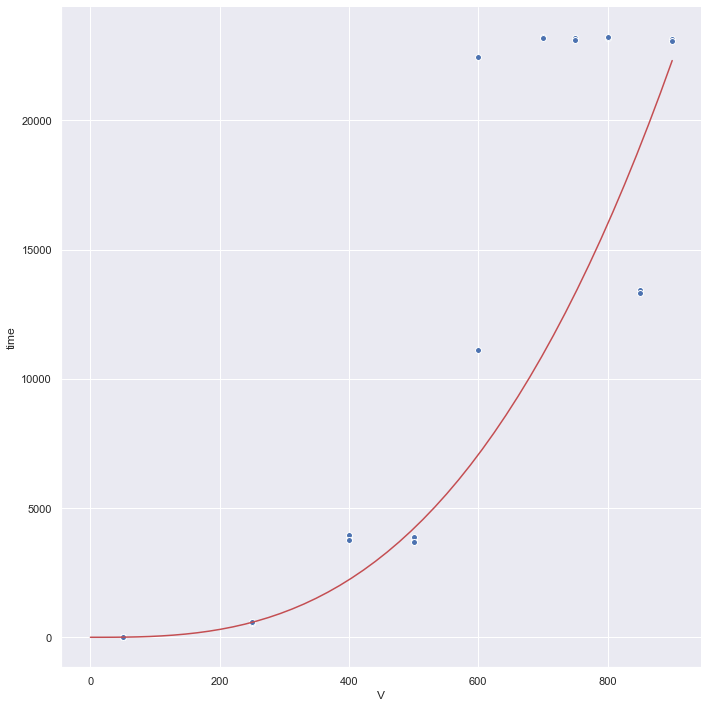

In [59]:
X_plot = np.linspace(0, 900)
Y_plot = (3686323*(X_plot**log(7, 2))/252105 - 317*X_plot**2/3 - 188*X_plot/5 - 25) * 8 / 1000000
g = sns.FacetGrid(df[df.algorithmId==2], height = 10)
g = g.map(plt.scatter, "V", "time", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')

print("Теоретическая кривая и реальные данные")
plt.show()

Сравнение 2-х алгоритмов


<AxesSubplot:xlabel='V', ylabel='time'>

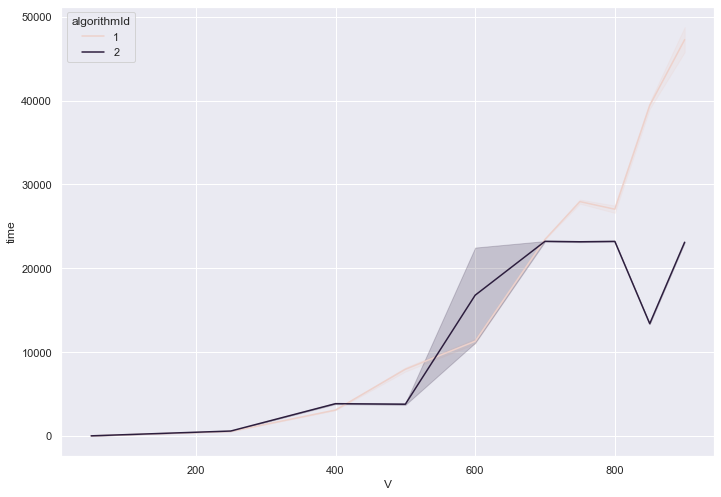

In [60]:
print("Сравнение 2-х алгоритмов")
sns.lineplot(data=df, x='V', y='time', hue='algorithmId')


Подбор оптимального параметра для алгоритма Штрассена


<AxesSubplot:xlabel='V', ylabel='time'>

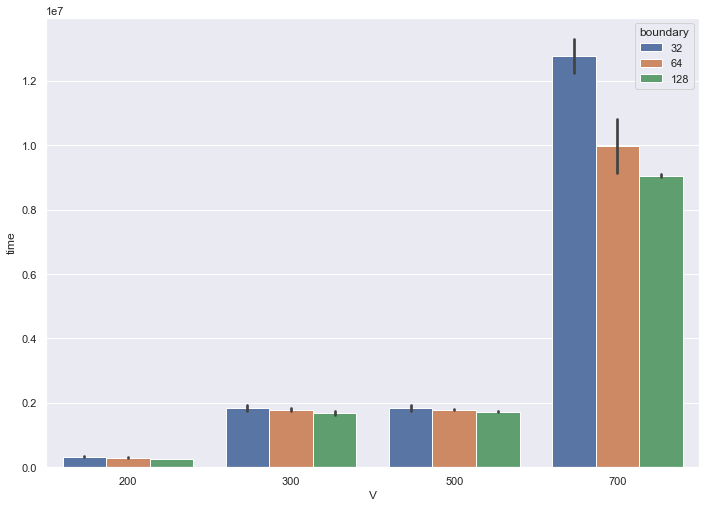

In [61]:
print("Подбор оптимального параметра для алгоритма Штрассена")
sns.barplot(data=df_opt_par, x='V', y='time', hue='boundary')